In [1]:
# python 2.7
# keras 1.2.2
# theano

In [17]:
# Let's point the keras backend to theano
# C:\\Users\\user_name\\.keras\\keras.json'

from keras import backend; 
from keras import backend as K
import os

def set_keras_backend(backend):
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend
        
print ("Change Keras Backend to Theano")        
set_keras_backend("theano")   
print(backend._BACKEND)

Change Keras Backend to Theano
theano


In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
#Let's begin with some sample images
path = "data/dogscats/sample/"

In [5]:
import utils
reload(utils)
from utils import plots

In [6]:
# Note that we are using a pre-trained model - vgg, that won 2014 imagenet challenge
import vgg16
reload(vgg16)
from vgg16 import Vgg16

In [7]:
vgg = Vgg16()

In [8]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 16 images belonging to 2 classes.


In [9]:
imgs,labels = next(batches)

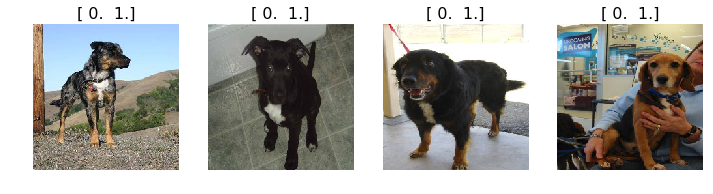

In [10]:
plots(imgs, titles=labels)

In [11]:
# the model isn't fine-tuned for dogs and cats yet, mapping is based on 1000 categories
vgg.predict(imgs, True)

(array([ 0.1735,  0.1329,  0.7147,  0.3414], dtype=float32),
 array([227, 179, 244, 237], dtype=int64),
 [u'kelpie',
  u'Staffordshire_bullterrier',
  u'Tibetan_mastiff',
  u'miniature_pinscher'])

In [12]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

In [13]:
batch_size=64
path = "data/dogscats/"

In [14]:
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
# Fine-tune for the dogscats dataset
vgg.finetune(batches)

In [16]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 9178s - loss: 0.1265 - acc: 0.9658 - val_loss: 0.0598 - val_acc: 0.9830
